Binary Classification Project

In [1]:
import pandas as pds

file = ('creditcard_2023.csv')

df =  pds.read_csv(file)


df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Check for null values and duplicate values:

In [2]:
df_null_count = df.isnull().sum()
df_duplicate_count = df.duplicated().sum()
if df_null_count.sum() == 0:
    print("No null values in the dataset")
else:
    print("There are this many null values: " + df_null_count)

if df_duplicate_count == 0:
    print("No duplicate values in the dataset")
else:
    print("There are this many duplicate values: " + df_duplicate_count)

No null values in the dataset
No duplicate values in the dataset


Need to remove features with low variance or no variance because they will not contribute much to the model and could cause overfitting if left in the dataset.

In [3]:
# Calculate the variance of each feature
variances = df.var()

# Sort the features by variance in ascending order
sorted_variances = variances.sort_values()

print(sorted_variances)

Class     2.500004e-01
V7        1.000002e+00
V28       1.000002e+00
V6        1.000002e+00
V26       1.000002e+00
V3        1.000002e+00
V2        1.000002e+00
V18       1.000002e+00
V23       1.000002e+00
V10       1.000002e+00
V25       1.000002e+00
V27       1.000002e+00
V17       1.000002e+00
V21       1.000002e+00
V20       1.000002e+00
V13       1.000002e+00
V9        1.000002e+00
V8        1.000002e+00
V22       1.000002e+00
V24       1.000002e+00
V5        1.000002e+00
V11       1.000002e+00
V19       1.000002e+00
V16       1.000002e+00
V12       1.000002e+00
V14       1.000002e+00
V4        1.000002e+00
V1        1.000002e+00
V15       1.000002e+00
Amount    4.788148e+07
id        2.694505e+10
dtype: float64


All the variances are very similar, so we will use correlation analysis next to remove a column that is tightly correlated with another column.

In [4]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
highly_correlated = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            highly_correlated.add(colname)

# Remove highly correlated features
print(highly_correlated)
highly_correlated.discard('Class')
print(highly_correlated)
df_reduced = df.drop(columns=highly_correlated)
df_reduced = df_reduced.drop(columns='id')
df_reduced

{'V18', 'V17', 'Class'}
{'V18', 'V17'}


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Now two highly correlated columns have been removed to reduce redundancy, which is a 6.4516% decrease in features, along with removing the id variable.

We can also reduce the number of features by removing quasi-constant features, which is a column that has 99% of the same data from column to column.

In [5]:
label_counts = df_reduced['Class'].value_counts()

print(label_counts)

Class
0    284315
1    284315
Name: count, dtype: int64


There are an equal number of Class types of 0 and 1, so there is no need for oversampling or undersampling.

Decision Tree:

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
Test Accuracy with Best Parameters: 0.9981094912333152
Cross-Validation Scores: [0.99580045 0.99716687 0.99680811]
Mean CV Score: 0.9965918097732486
Confusion Matrix:
 [[56614   136]
 [   79 56897]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



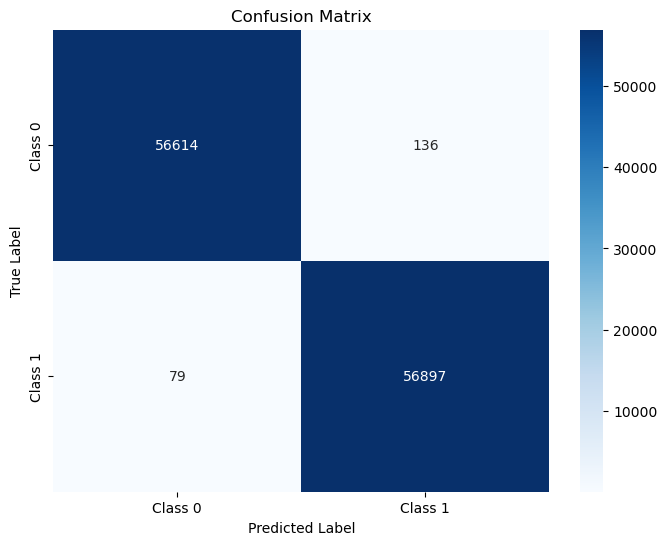

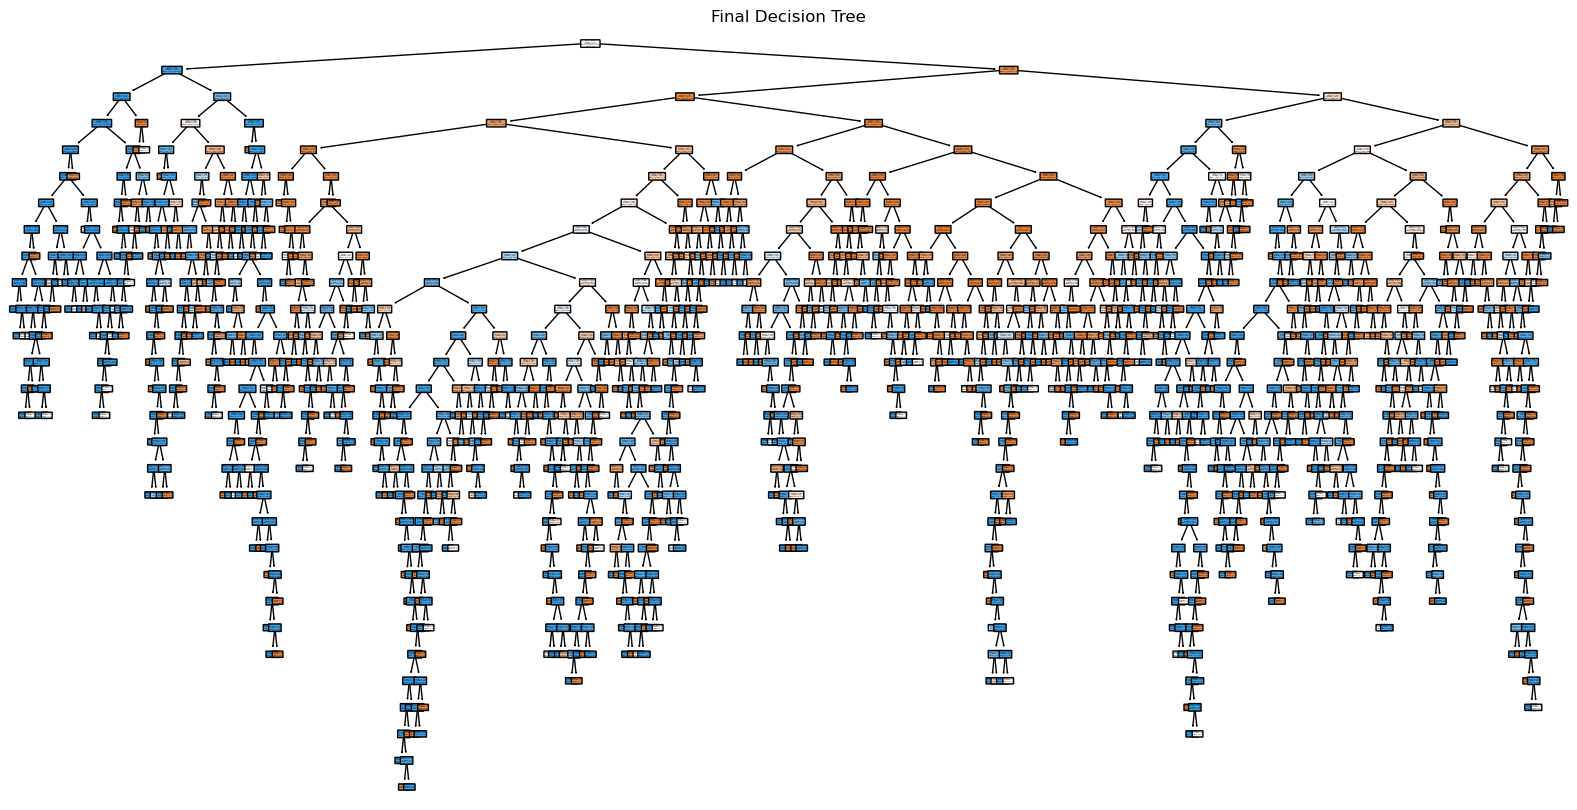

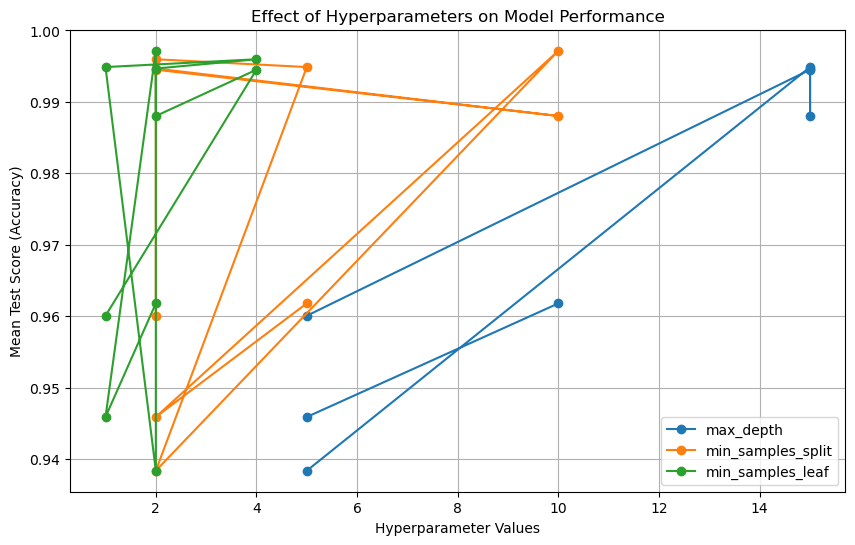

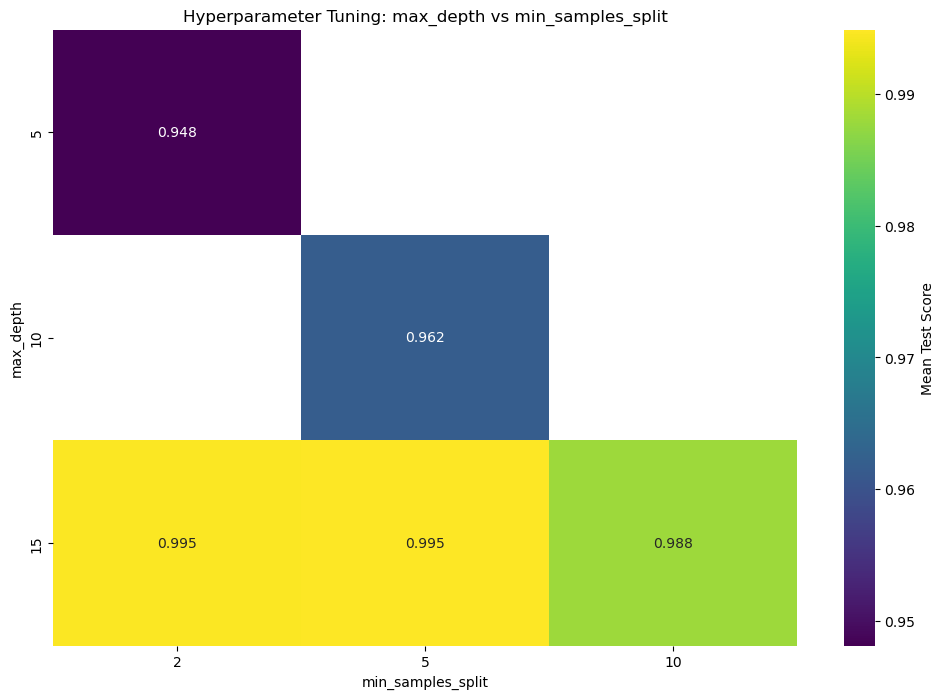

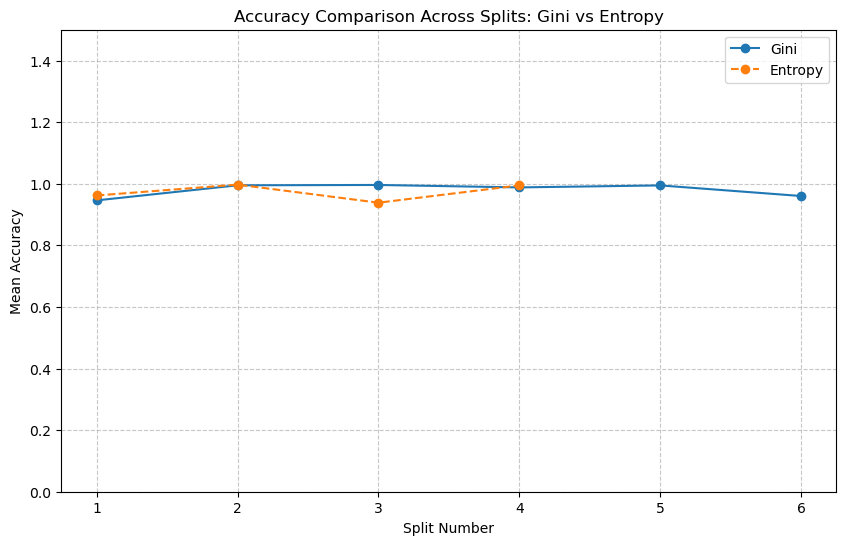

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree model
d_tree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_distributions = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 5, 10, 15],    # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples per leaf node
    'splitter': ['best', 'random']    # Split strategy
}

# Use RandomizedSearchCV instead of GridSearchCV for faster results
randomized_search = RandomizedSearchCV(
    estimator=d_tree, 
    param_distributions=param_distributions, 
    n_iter=10,  # Number of random combinations to try
    cv=3,       # Use 3-fold cross-validation for faster results
    scoring='accuracy', 
    n_jobs=-1,  # Utilize all CPU cores for parallel processing
    random_state=42, 
    verbose=1   # Display progress during search
)

# Fit the randomized search to the training data
randomized_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = randomized_search.best_params_
best_d_tree = randomized_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_d_tree.predict(X_test)
accuracy = best_d_tree.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", accuracy)

# Cross-validation score with the best model
cv_scores = cross_val_score(best_d_tree, X, y, cv=3)  # Use 3-fold for faster computation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualize the final decision tree
plt.figure(figsize=(20, 10))  # Set figure size for readability
tree.plot_tree(best_d_tree, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("Final Decision Tree")
plt.show()

# --- Visualizing Hyperparameter Impact ---
# Extract the results from RandomizedSearchCV
results = pd.DataFrame(randomized_search.cv_results_)

# Visualize the effect of different parameters on the mean test score
plt.figure(figsize=(10, 6))

# Plot max_depth vs mean_test_score
if 'param_max_depth' in results:
    plt.plot(results['param_max_depth'], results['mean_test_score'], marker="o", label='max_depth')

# Plot min_samples_split vs mean_test_score
if 'param_min_samples_split' in results:
    plt.plot(results['param_min_samples_split'], results['mean_test_score'], marker="o", label='min_samples_split')

# Plot min_samples_leaf vs mean_test_score
if 'param_min_samples_leaf' in results:
    plt.plot(results['param_min_samples_leaf'], results['mean_test_score'], marker="o", label='min_samples_leaf')

# Customize the plot
plt.xlabel("Hyperparameter Values")
plt.ylabel("Mean Test Score (Accuracy)")
plt.title("Effect of Hyperparameters on Model Performance")
plt.legend()
plt.grid(True)
plt.show()

# --- Heatmap for Parameter Interaction ---
# Pivot the results to create a heatmap of max_depth vs min_samples_split
if 'param_max_depth' in results and 'param_min_samples_split' in results:
    heatmap_data = results.pivot_table(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Mean Test Score'})
    plt.title("Hyperparameter Tuning: max_depth vs min_samples_split")
    plt.xlabel("min_samples_split")
    plt.ylabel("max_depth")
    plt.show()

# Extract results from RandomizedSearchCV
results = pd.DataFrame(randomized_search.cv_results_)

# Filter results for gini and entropy
gini_results = results[results['param_criterion'] == 'gini']
entropy_results = results[results['param_criterion'] == 'entropy']

# Extract mean_test_score for each split
gini_accuracies = gini_results['mean_test_score'].values
entropy_accuracies = entropy_results['mean_test_score'].values

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(gini_accuracies) + 1), gini_accuracies, marker='o', label='Gini', linestyle='-')
plt.plot(range(1, len(entropy_accuracies) + 1), entropy_accuracies, marker='o', label='Entropy', linestyle='--')

# Add labels, title, and legend
plt.title("Accuracy Comparison Across Splits: Gini vs Entropy")
plt.xlabel("Split Number")
plt.ylabel("Mean Accuracy")
plt.ylim(0, 1.5)
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()




k-Nearest Neighbors:

Accuracy: 0.9360744244939592
Accuracy: 0.9477955788474052


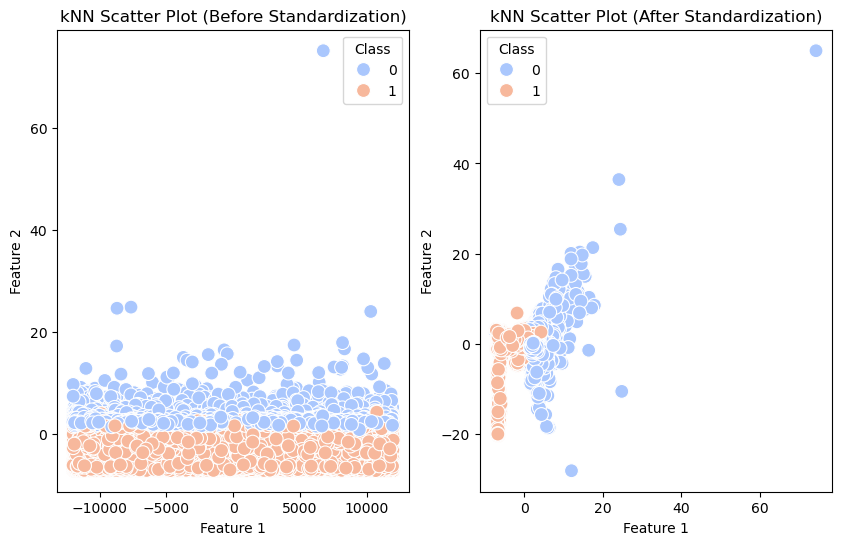

Confusion Matrix:
 [[54410  2340]
 [ 3597 53379]]


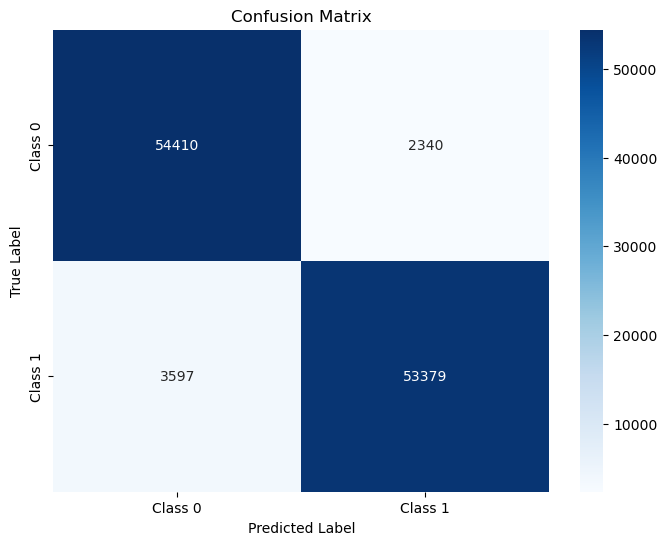

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     56750
           1       0.96      0.94      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Best k value for euclidean metric: 10
Max Accuracy for euclidean metric: 0.9492486302468622
Best k value for manhattan metric: 10
Max Accuracy for manhattan metric: 0.9491321214380845
Best k value for minkowski metric: 10
Max Accuracy for minkowski metric: 0.9492354400274351


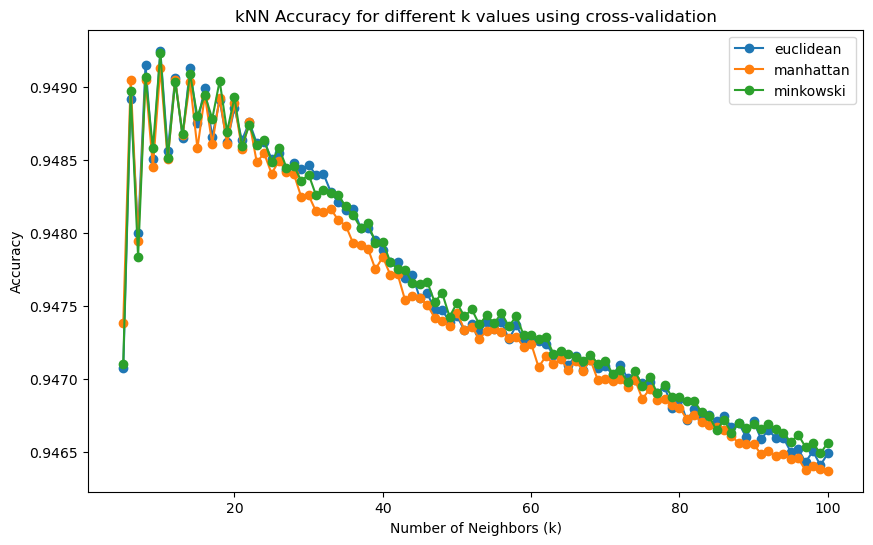

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed

# Preprocess the data but not standardizing the data
# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Scatter Plot
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train, palette='coolwarm', s=100, ax=axes[0])
axes[0].set_title('kNN Scatter Plot (Before Standardization)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Preprocess the data but standardizing the data
# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Avoid fitting on the test data

# Perform dimensionality reduction
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train)

# Make predictions and evaluate
y_pred = knn.predict(X_test_reduced)
accuracy = knn.score(X_test_reduced, y_test)
print("Accuracy:", accuracy)

# Scatter Plot
sns.scatterplot(x=X_train_reduced[:, 0], y=X_train_reduced[:, 1], hue=y_train, palette='coolwarm', s=100, ax=axes[1])
axes[1].set_title('kNN Scatter Plot (After Standardization)')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Accuracy Plot for different k values
k_values = range(5, 101)

def compute_accuracy(k, metric):
    if metric == 'minkowski':
        knn = KNeighborsClassifier(n_neighbors=k, p=3, metric=metric)
    else:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    
    cv_scores = cross_val_score(knn, X_train_reduced, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

plt.figure(figsize=(10, 6))
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
for metric in distance_metrics:
    accuracies = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k, metric) for k in k_values)
    plt.plot(k_values, accuracies, marker="o", label=metric)
    
    # Find the best k value
    best_k_index = np.argmax(accuracies)
    best_k = k_values[best_k_index]
    max_accuracy = accuracies[best_k_index]
    print(f"Best k value for {metric} metric: {best_k}")
    print(f"Max Accuracy for {metric} metric: {max_accuracy}")

plt.title("kNN Accuracy for different k values using cross-validation")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Gaussian Naïve Bayes:

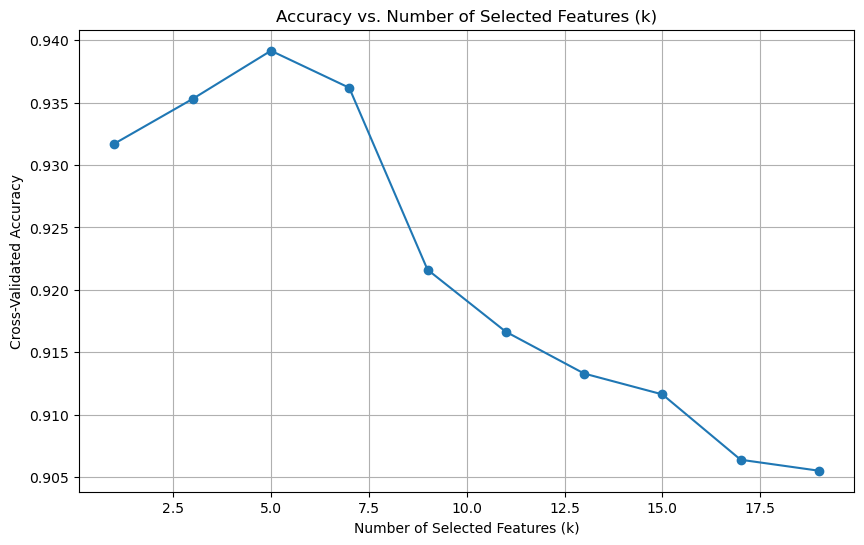

Best k: 5 with Accuracy: 0.9392
Selected Features: Index(['V4', 'V10', 'V11', 'V12', 'V14'], dtype='object')
Test Accuracy: 0.9389321703040642
F1 Score: 0.9387436735774907
Confusion Matrix:
 [[56489   261]
 [ 6684 50292]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     56750
           1       0.99      0.88      0.94     56976

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



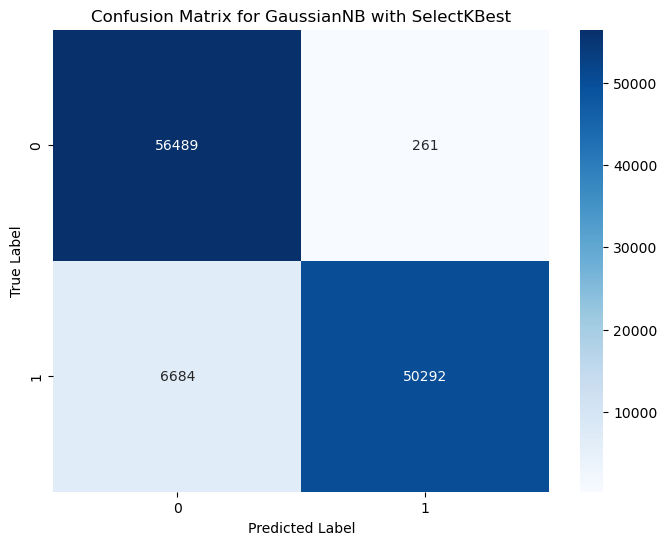

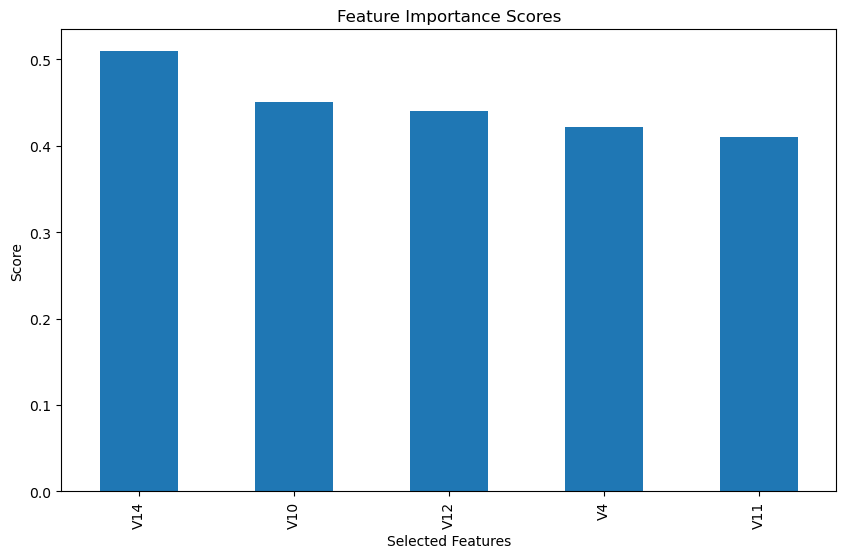

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the range of k values
k_values = range(1, min(X.shape[1], 20), 2)  # Test every 2nd value of k up to 20 or total features

def compute_accuracy(k):
     # Define the pipeline
    pipeline = Pipeline([
        ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=k)),
        ('classification', GaussianNB())
    ])
    
    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X, y, cv=3, scoring='accuracy')  # Use 3-fold CV for speed
    return cv_scores.mean()

accuracy_scores = Parallel(n_jobs=-1)(delayed(compute_accuracy)(k) for k in k_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs. Number of Selected Features (k)")
plt.xlabel("Number of Selected Features (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.grid()
plt.show()

# Find the best k
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)
print(f"Best k: {best_k} with Accuracy: {best_accuracy:.4f}")

# Refit the pipeline with the best k
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=best_k)),
    ('classification', GaussianNB())
])
pipeline.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[pipeline.named_steps['feature_selection'].get_support()]
print("Selected Features:", selected_features)

# Evaluate on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and F1 score
accuracy = pipeline.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Test Accuracy:", accuracy)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
classes = y.unique()  # Dynamically fetch class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for GaussianNB with SelectKBest")
plt.show()

# Visualize Feature Importance
feature_scores = pipeline.named_steps['feature_selection'].scores_
selected_scores = feature_scores[pipeline.named_steps['feature_selection'].get_support()]
selected_features_scores = pd.Series(selected_scores, index=selected_features)

plt.figure(figsize=(10, 6))
selected_features_scores.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance Scores")
plt.ylabel("Score")
plt.xlabel("Selected Features")
plt.show()





Logistic Regression: 

Accuracy: 0.961319311327225
F1: 0.9613090670908213
Cross-Validation Accuracy Scores: [0.9591826  0.96240086 0.95684364 0.95562141 0.9576614 ]
Mean Cross-Validation Accuracy: 0.9583419798462973
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     56750
           1       0.98      0.94      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Confusion Matrix:
 [[55534  1216]
 [ 3183 53793]]


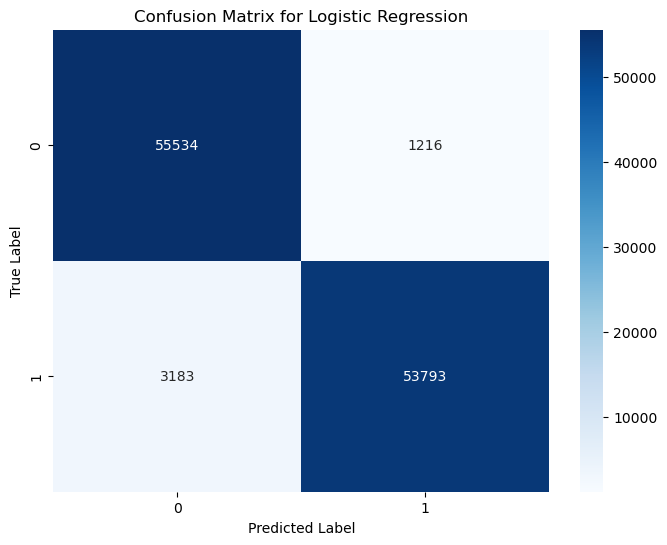

Feature Importance:
 V4        2.770173
V11       1.153481
V22       0.437888
V21       0.204432
V25       0.098154
V28       0.075494
V27       0.005035
Amount   -0.005008
V13      -0.014228
V20      -0.034760
V5       -0.090717
V24      -0.103666
V26      -0.104844
V2       -0.106475
V19      -0.195409
V15      -0.198944
V23      -0.248701
V6       -0.313009
V1       -0.422126
V9       -0.627252
V7       -0.639602
V3       -0.698727
V16      -0.882280
V10      -1.005390
V12      -1.971316
V14      -2.123006
V8       -2.423869
dtype: float64


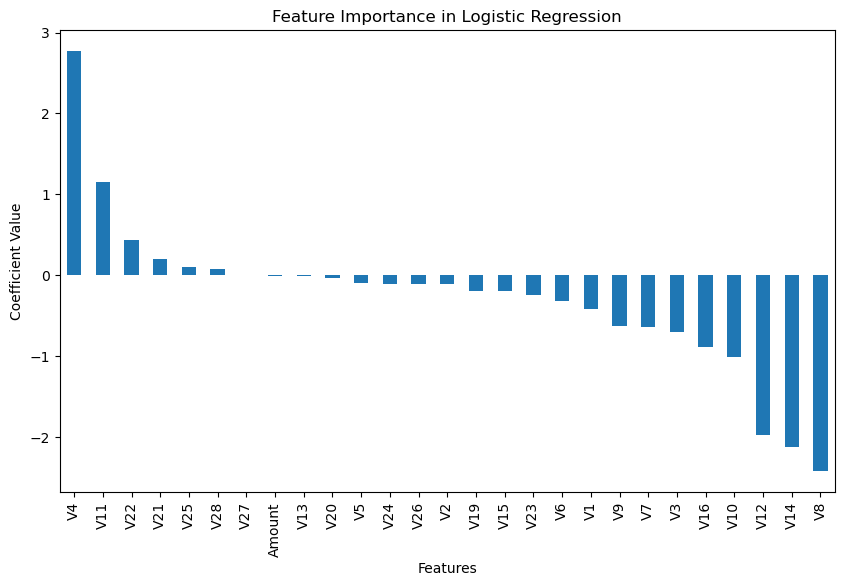

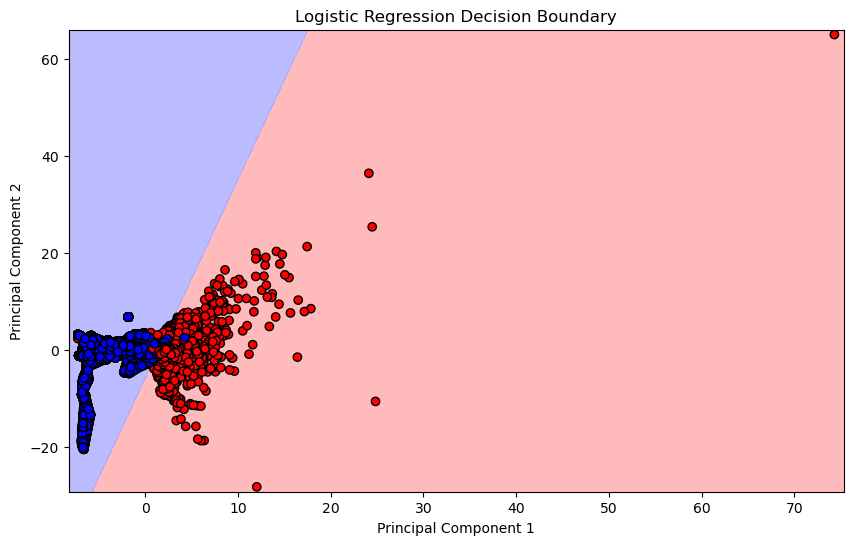

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Split data into features (X) and target (y)
X = df_reduced.drop('Class', axis=1)
y = df_reduced['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression classifier
clf = LogisticRegression(max_iter=2000)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model using accuracy and F1 measures
accuracy = clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1:", f1)

# Cross-Validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
classes = y.unique()  # Dynamically fetch class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Feature Importance
feature_importance = pd.Series(clf.coef_[0], index=X.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# --- Visualization of Decision Boundary ---
# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain logistic regression on the 2D reduced data
clf_2d = LogisticRegression(max_iter=1000)
clf_2d.fit(X_train_2d, y_train)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the meshgrid points
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training data
plt.figure(figsize=(10, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Background colors for decision regions
cmap_points = ListedColormap(['#FF0000', '#0000FF'])      # Colors for data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_background)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_points, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



Test our best model on data from 2013 to see its performance

In [ ]:
file_2013 = ('creditcard_2013.csv')

df_2013 = pds.read_csv(file_2013)

df_2013

In [ ]:
label_counts_2013 = df_2013['Class'].value_counts()

print(label_counts_2013)

Try 2013 on Decision Tree

In [ ]:
# Assuming 'Class' is the target column, drop it to get features
if 'Class' in df_2013.columns:
    X_new = df_2013.drop('Class', axis=1)
    y_new_true = df_2013['Class']
else:
    X_new = df_2013

# Check for feature mismatches
train_features = set(X_train.columns)
new_features = set(X_new.columns)

missing_features = train_features - new_features
extra_features = new_features - train_features

print("Missing Features:", missing_features)
print("Extra Features:", extra_features)

# Add missing features with default values and drop extra features
for feature in missing_features:
    X_new[feature] = 0

X_new = X_new[X_train.columns]  # Ensure correct column order

# Predict with the trained model
y_new_pred = best_d_tree.predict(X_new)

# If true labels are available, evaluate performance
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    print("New Dataset Accuracy:", accuracy_score(y_new_true, y_new_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_new_true, y_new_pred))
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred))
else:
    print("Predictions completed. No true labels available for evaluation.")

Try 2013 on kNN

In [ ]:
# Standardize the new dataset
X_new_scaled = scaler.transform(X_new)  # Use the scaler fitted on training data

# Apply PCA to reduce dimensionality
X_new_reduced = pca.transform(X_new_scaled)  # Use the PCA fitted on training data

# Predict with the trained KNN model
y_new_pred = knn.predict(X_new_reduced)

# Evaluate if true labels are available
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    # Calculate accuracy
    new_accuracy = accuracy_score(y_new_true, y_new_pred)
    print("New Dataset Accuracy:", new_accuracy)

    # Confusion Matrix
    conf_matrix_new = confusion_matrix(y_new_true, y_new_pred)
    print("Confusion Matrix:\n", conf_matrix_new)

    # Classification Report
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for creditcard_2013.csv")
    plt.show()
else:
    print("Predictions completed. No true labels available for evaluation.")



2013 on Gaussian Naive Bayes

In [ ]:
# Use the trained pipeline to select features and predict
# Feature selection is embedded in the pipeline, so just transform and predict
y_new_pred = pipeline.predict(X_new)

# Evaluate the predictions if true labels are available
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

    # Calculate accuracy and F1 score
    new_accuracy = accuracy_score(y_new_true, y_new_pred)
    new_f1 = f1_score(y_new_true, y_new_pred, average='weighted')
    print("New Dataset Accuracy:", new_accuracy)
    print("New Dataset F1 Score:", new_f1)

    # Confusion Matrix
    conf_matrix_new = confusion_matrix(y_new_true, y_new_pred)
    print("Confusion Matrix:\n", conf_matrix_new)

    # Classification Report
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred))

    # Plot Confusion Matrix
    classes = y.unique()  # Dynamically fetch class labels from training data
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", 
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for GaussianNB on creditcard_2013.csv")
    plt.show()
else:
    print("Predictions completed. No true labels available for evaluation.")



2013 on Logistic Regression

In [ ]:
# Standardize the new dataset
X_new_scaled = scaler.fit_transform(X_new)  # Use the scaler fitted on training data



# Predict with the trained Logistic Regression model
y_new_pred = clf.predict(X_new_scaled)

# Evaluate the predictions if true labels are available
if 'Class' in df_2013.columns:
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

    # Calculate accuracy and F1 score
    new_accuracy = accuracy_score(y_new_true, y_new_pred)
    new_f1 = f1_score(y_new_true, y_new_pred, average='weighted')
    print("New Dataset Accuracy:", new_accuracy)
    print("New Dataset F1 Score:", new_f1)

    # Confusion Matrix
    conf_matrix_new = confusion_matrix(y_new_true, y_new_pred)
    print("Confusion Matrix:\n", conf_matrix_new)

    # Classification Report
    print("Classification Report:\n", classification_report(y_new_true, y_new_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", 
                xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for Logistic Regression on creditcard_2013.csv")
    plt.show()
else:
    print("Predictions completed. No true labels available for evaluation.")
